<a href="https://colab.research.google.com/github/petroniocandido/STPE/blob/main/S%C3%A9ries_Temporais_e_Processos_Estoc%C3%A1sticos_S%C3%A9ries_N%C3%A3o_Lineares_%26_AMI_Average_Mutual_Information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise e Previsão de Séries Não-Lineares

**Disciplina:** Tópicos Especiais - Séries Temporais e Processos Estocásticos

**Professor:** <a href="http://petroniocandido.github.io"> Petrônio Cândido de Lima e Silva</a> <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-1202-2552" href="https://orcid.org/0000-0002-1202-2552" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (petronio.candido@ifnmg.edu.br)

[![made-with-python](https://img.shields.io/badge/Made%20with-Python-1f425f.svg)](https://www.python.org/)  [![made-with-latex](https://img.shields.io/badge/Made%20with-LaTeX-1f425f.svg)](https://www.latex-project.org/) [![ForTheBadge built-with-love](http://ForTheBadge.com/images/badges/built-with-love.svg)](https://GitHub.com/Naereen/) [![ForTheBadge built-with-science](http://ForTheBadge.com/images/badges/built-with-science.svg)](https://GitHub.com/Naereen/)




<center>
  <table><tr>
<td><a href="https://ppgmcs.com.br/"><img src="https://ppgmcs.com.br/wp-content/uploads/ppgmcs.png" alt="Programa de Pós-Graduação em Modelagem Computacional e Sistemas - PPGMCS/Unimontes" height="60" width="150"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>

<td><a href="#"><img src="https://avatars1.githubusercontent.com/u/54992196?s=400&u=4c96d4fc0560b6957233f1dd91a9560de4a054b2&v=4" alt="{cidic} - Grupo de Pesquisa em Ciência de Dados e Inteligência Computacional" width="100"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  
<td>
   <a href="http://www.ifnmg.edu.br/"><img src="https://github.com/petroniocandido/PhdThesis/raw/master/figures/ifnmg.jpg" alt="IFNMG - Instituto Federal do Norte de Minas Gerais" width="100"/></a></td>
</tr>
</table>
</center>

[![licensebuttons by-nc-sa](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png)](https://creativecommons.org/licenses/by-nc-sa/4.0) 

In [ ]:
!pip3 install -U git+https://github.com/PYFTS/pyFTS
!git clone https://github.com/petroniocandido/RNA.git

  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-tfjmv_ap
  Running command git clone -q https://github.com/PYFTS/pyFTS /tmp/pip-req-build-tfjmv_ap
  Created wheel for pyFTS: filename=pyFTS-1.6-py3-none-any.whl size=217118 sha256=d52120bf35bffc36528f8332e22fb3eb3508bfecc032f154afc0f95d22fcd1f1
  Stored in directory: /tmp/pip-ephem-wheel-cache-slui1s_8/wheels/30/23/2b/2e10c811e284f08e37b5f6d6320e78bade4dd580081288f61a
Successfully built pyFTS
Cloning into 'RNA'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 42 (delta 19), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (42/42), done.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from RNA import FuncoesAtivacao
from RNA import FuncoesCusto
from RNA import MLP

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Análise de Séries Temporais Não Lineares

### Métricas Lineares

In [ ]:
def Var(X):
  n = len(X)
  mx = np.mean(X)
  c = np.mean([(x - mx)**2 for x in X])
  return c

def AutoCov(X, k):
  n = len(X)
  mx = np.mean(X)
  c = np.zeros(n-k)
  for i in range(n - k):
    c[i] = (X[i] - mx)*(X[i+k] - mx)
  c = c.mean()
  
  return c

def CrossCov(X, Y, k):
  n = len(X)
  mx = np.mean(X)
  my = np.mean(Y)
  c = np.zeros(n-k)
  for i in range(n - k):
    c[i] = (X[i] - mx)*(Y[i+k] - my)
  c = c.mean()
  
  return c

def ACF(X, k):
  gamma_k = AutoCov(X, k)
  gamma_0 = Var(X)
  return gamma_k / gamma_0

def CCF(X, Y, k):
  gamma_xy = CrossCov(X, Y, k)
  gamma_x = Var(X)
  gamma_y = Var(Y)
  return gamma_xy / np.sqrt(gamma_x * gamma_y)


In [ ]:
def plot_acf(X, k, **kwargs):
  acf = []
  for i in range(k):
    acf.append(ACF(X, i))

  ax = kwargs.get("axis", None)
  if ax is None:
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[10,5])

  ax.hlines([0],[0],[k], color="black")
  ax.vlines([i for i in range(k)], [0 for i in range(k)], acf, color="red")
  ax.scatter([i for i in range(k)], acf, marker="o")
  ax.set_ylim([-1.05, 1.05])
  ax.set_xlabel("k")
  ax.set_ylabel("ACF(k)")

def plot_ccf(X, Y, k, **kwargs):
  ccf = []
  for i in range(k):
    ccf.append(CCF(X, Y,  i))

  ax = kwargs.get("axis", None)
  if ax is None:
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[10,5])

  ax.hlines([0],[0],[k], color="black")
  ax.vlines([i for i in range(k)], [0 for i in range(k)], ccf, color="red")
  ax.scatter([i for i in range(k)], ccf, marker="o")
  ax.set_ylim([-1.05, 1.05])
  ax.set_xlabel("k")
  ax.set_ylabel("CCF(k)")

### Métricas Não Lineares (Teoria da Informação)

**Informação Mútua**
--------

 * Mede a dependência mútua entre duas variáveis aleatórias X e Y, e é uma métrica não linear
 * A Informação Mútua significa a quantidade de informação (a base do logaritmo determina a unidade de informação) que se pode saber de X quando se conhece Y 
 * $I(X, Y) \in [0,\infty] $
 * Se $X \perp Y$ então $I(X, Y) = 0$
 
$$I(X,Y) =  \mathbb{E}\left[ \log \left( \frac{P(x,y)}{P(x)\cdot P(y)} \right) \right]$$

$$I(X,Y) = \sum_{X} \sum_{Y} P(x_i,y_j) \cdot \log \left( \frac{P(x_i,y_j)}{P(x_i)\cdot P(y_j)} \right) $$


**$AMI_X(\tau)$ - Média da Informação Mútua**
--------
* AMI - Average Mutual Information
* O AMI substitui o ACF para séries não-lineares.
* A desvantagem do AMI em relação ao ACF é que este precisa apenas de amostras de $X$ e $Y$, já o AMI precisa das distribuições de probabilide $P(X)$ 4 $P(Y)$, que o torna mais complexo o computacionalmente caro
* O AMI é a Informação Mútua entre as variáveis aleatórias de dois tempos $t$ e $t + \tau$ do mesmo processo estocástico $X$:

$$AMI_X(\tau) = I( X(t), X(t+\tau) )$$
<br />
$$AMI_X(\tau) = \sum_{i} \sum_{j} P(i,j) \cdot \log \left( \frac{P(i,j)}{P(i)\cdot P(j)} \right) $$

* Onde:
  * $P(i) \equiv P(x(t) = i)$
  * $P(j) \equiv P(x(t + \tau) = j)$
  * $P(i,j) \equiv P(x(t) = i, x(t + \tau) = j)$

* Podemos normalizar $AMI_X(\tau)$ no intervalo $[0,1]$, dividindo $AMI_X(\tau)$ pela entropia $H(X)$ do processo $X$

 $$AMI_X(\tau) = \frac{AMI_X(\tau)}{H(X)}$$

**$AMI_{X,Y}(\tau)$ - Média da Informação Mútua Multivariada**
--------

$$AMI_{X,Y}(\tau) = I( X(t), Y(t+\tau) )$$

$$AMI_{X,Y}(\tau) = \sum_{i} \sum_{j} P(i,j) \cdot \log \left( \frac{P(i,j)}{P(i)\cdot P(j)} \right) $$

* Onde:
  * $P(i) \equiv P(x(t) = i)$
  * $P(j) \equiv P(y(t + \tau) = j)$
  * $P(i,j) \equiv P(x(t) = i, y(t + \tau) = j)$

* Podemos normalizar $AMI_{X,Y}(\tau)$ no intervalo $[0,1]$, dividindo $AMI_{X,Y}(\tau)$ pela entropia conjunta $H(X,Y)$ do processo


$$AMI_{X,Y}(\tau) = \frac{AMI_{X,Y}(\tau)}{H(X,Y)}$$


In [ ]:
# Discretiza o Espaço Amostral de uma Série Temporal para 
# criar uma distribuição de probabilidade discreta
def binning(X, nbins):
  vmin = np.min(X)
  vmax = np.max(X)
  bins = np.linspace(vmin, vmax, nbins)
  bsize = bins[1] - bins[0]
  return bins, bsize

# Busca Binária - Encontra a qual bin um valor x pertence
def binary_search(x, bins, bsize):
  low = 0
  high = len(bins)
  mid = 0
  while low <= high:
    mid = (high + low) // 2
    if bins[mid] + bsize < x:
      low = mid + 1
    elif bins[mid] > x:
      high = mid - 1
    else:
      return bins[mid]
  return -1

# P(X) - Distribuição marginal
def pmf(X, nbins):
  bins, bsize = binning(X, nbins)
  p = { k: 0. for k in bins}
  inc = 1/len(X)
  for x in X:
    p[binary_search(x, bins, bsize)] += inc
  return p

# P(x(t), x(t+tau)) - Distribuição Conjunta
def conj_pmf(X, nbins, tau):
  bins, bsize = binning(X, nbins)
  p = { i: { j: 0. for j in bins } for i in bins}
  inc = 1/(len(X)-tau)
  for i in range(len(X)-tau):
    ii = binary_search(X[i], bins, bsize)
    jj = binary_search(X[i + tau], bins, bsize)
    p[ii][jj] += inc
  return p

# P(X,Y) - distribuição conjunta multivariada
def conj(X, Y, nbins, tau):
  xbins, xbsize = binning(X, nbins)
  ybins, ybsize = binning(Y, nbins)
  p = { i: { j: 0. for j in ybins } for i in xbins}
  inc = 1/(len(X)-tau)
  for i in range(len(X)-tau):
    ii = binary_search(X[i], xbins, xbsize)
    jj = binary_search(Y[i+tau], ybins, ybsize)
    p[ii][jj] += inc
  return p

# Informação Mútua univariada para os lags 0 à tau
def MI(X, tau, nbins=100):
  mi = 0
  p = pmf(X, nbins)
  pij = conj_pmf(X, nbins, tau)
  for i in p.keys():
    for j in p.keys():
      if p[i] > 0 and p[j] > 0 and pij[i][j] > 0:
        mi += pij[i][j] * np.log( pij[i][j] / (p[i] * p[j]) )
  return mi

# Informação Mútua multivariada para os lags 0 à tau
def MI_multivariado(X, Y, nbins=100):
  mi = 0
  px = pmf(X, nbins)
  py = pmf(Y, nbins)
  pij = conj(X, Y, nbins, tau)
  for i in px.keys():
    for j in py.keys():
      if px[i] > 0 and py[j] > 0 and pij[i][j] > 0:
        mi += pij[i][j] * np.log( pij[i][j] / (px[i] * py[j]) )
  return mi

# Entropia de uma distribuição univariada
def H(X, nbins=100):
  h = 0
  p = pmf(X, nbins)
  for i in p.keys():
    if p[i] > 0:
      h += p[i] * np.log( p[i])
  return -h

# Entropia de uma distribuição conjunta
def H_conj(X, Y, nbins=100):
  h = 0
  p = conj(X, Y, nbins, 0)
  for i in p.keys():
    for j in p[i].keys():
      if p[i][j] > 0:
        h += p[i][j] * np.log( p[i][j])
  return -h

# Informação Mútua univariada para os lags 0 à tau
def AMI(X, tau, nbins=100):
  ami = np.zeros(tau)
  p = pmf(X, nbins)
  h = H(X, nbins)
  for t in range(tau):
    mi = 0
    pij = conj_pmf(X, nbins, t)
    for i in p.keys():
      for j in p.keys():
        if p[i] > 0 and p[j] > 0 and pij[i][j] > 0:
          mi += pij[i][j] * np.log( pij[i][j] / (p[i] * p[j]) )
    ami[t] = mi
  return ami/h

# Informação Mútua multivariada para os lags 0 à tau
def AMI_multivariado(X, Y, tau, nbins=100):
  ami = np.zeros(tau)
  px = pmf(X, nbins)
  py = pmf(Y, nbins)
  h = H_conj(X,Y, nbins)
  for t in range(tau):
    mi = 0
    pij = conj(X, Y, nbins, t)
    for i in px.keys():
      for j in py.keys():
        if px[i] > 0 and py[j] > 0 and pij[i][j] > 0:
          mi += pij[i][j] * np.log( pij[i][j] / (px[i] * py[j]) )
    ami[t] = mi
  return ami/h


In [ ]:
def plot_ami(X, k, **kwargs):
  ami = AMI(X, k)

  ax = kwargs.get("axis", None)
  if ax is None:
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[10,3])

  ax.hlines([0],[0],[k], color="black")
  ax.vlines([i for i in range(k)], [0 for i in range(k)], ami, color="red")
  ax.scatter([i for i in range(k)], ami, marker="o")
  ax.set_ylim([0,1.05])
  ax.set_xlabel("k")
  ax.set_ylabel("AMI(k)")

def plot_cross_ami(X, Y, k, **kwargs):
  ami = AMI_multivariado(X,Y, k)

  ax = kwargs.get("axis", None)
  if ax is None:
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[10,5])

  ax.hlines([0],[0],[k], color="black")
  ax.vlines([i for i in range(k)], [0 for i in range(k)], ami, color="red")
  ax.scatter([i for i in range(k)], ami, marker="*")
  ax.set_xlabel("k")
  ax.set_ylabel("AMI(k)")
  ax.set_ylim([0,1.05])

### Datasets


#### Mackey-Glass

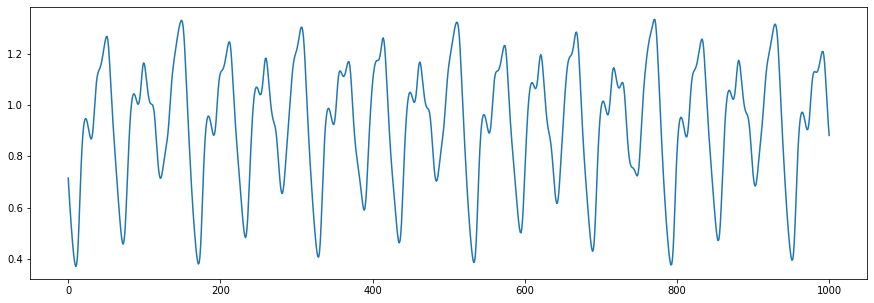

In [ ]:
from pyFTS.data import mackey_glass

st1 = np.array(mackey_glass.get_data())

fig, ax = plt.subplots(1, 1, figsize=(15,5))

ax.plot(st1)

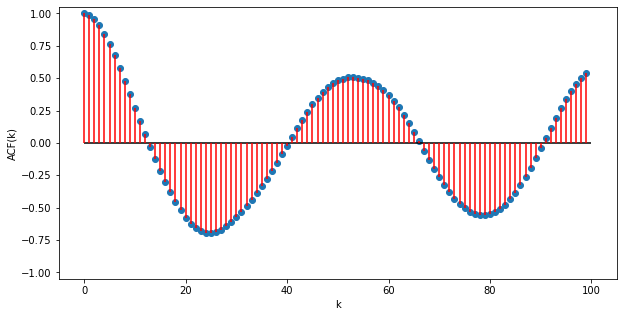

In [ ]:
plot_acf(st1, 100)

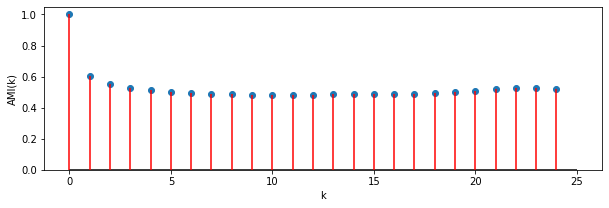

In [ ]:
plot_ami(st1, 25, nbins=100)

#### Mapa Logístico

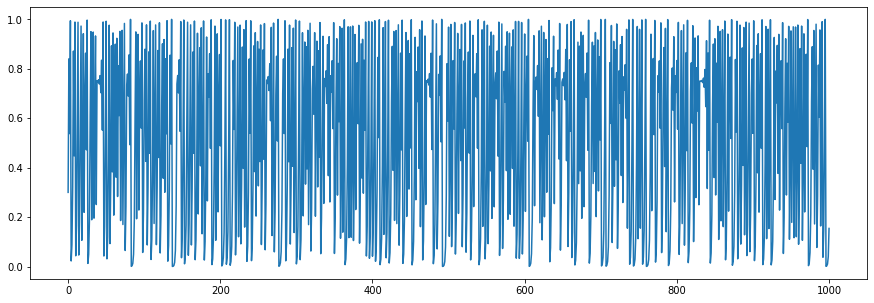

In [ ]:
from pyFTS.data import logistic_map

st2 = np.array(logistic_map.get_data(iterations=1000))

fig, ax = plt.subplots(1, 1, figsize=(15,5))

ax.plot(st2)

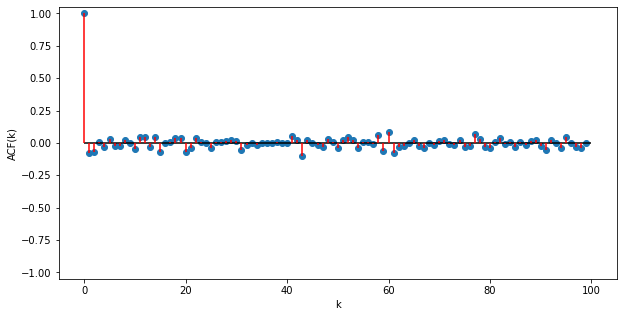

In [ ]:
plot_acf(st2, 100)

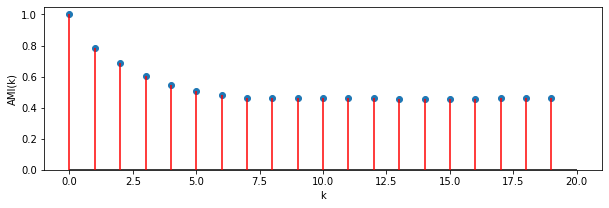

In [ ]:
plot_ami(st2, 20)

#### Mapa de Henon

In [ ]:
from pyFTS.data import henon

st3 = henon.get_dataframe(iterations=1000)

st3.head()

,x,y
0,1.000000,1.0000
1,0.700000,1.0000
2,1.210000,0.7000
3,0.145900,1.2100
4,1.741713,0.1459


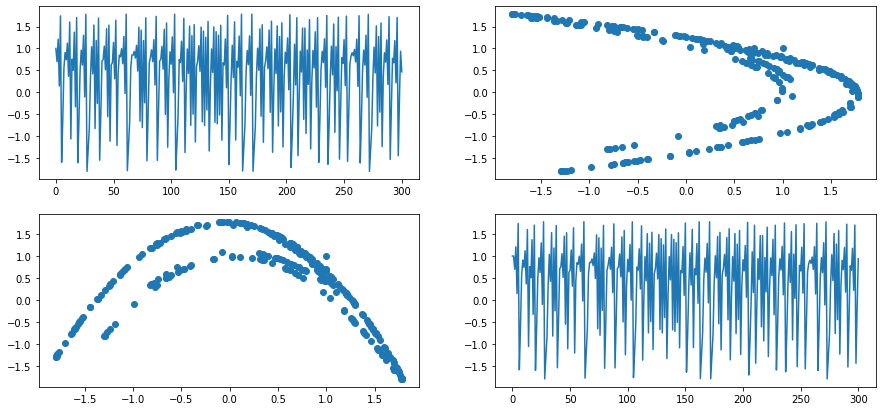

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(15,7))

ax[0][0].plot(st3['x'].values)
ax[0][1].scatter(st3['x'].values, st3['y'].values)
ax[1][0].scatter(st3['y'].values, st3['x'].values)
ax[1][1].plot(st3['y'].values)

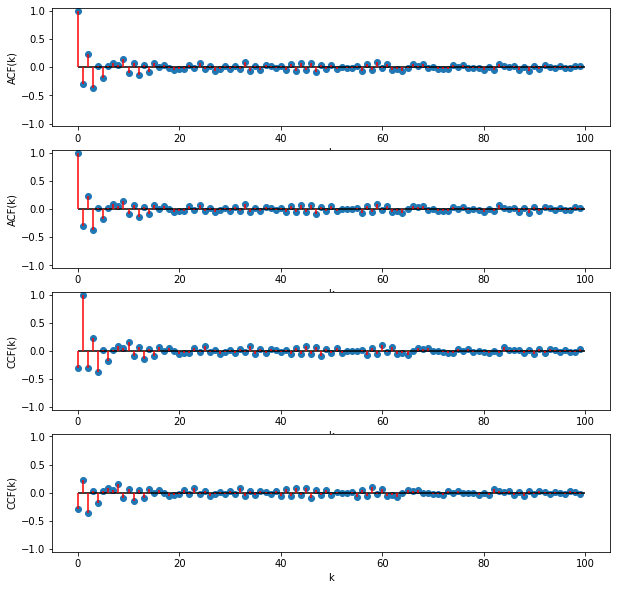

In [ ]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))

plot_acf(st3['x'].values, 100, axis=ax[0])
plot_acf(st3['y'].values, 100, axis=ax[1])
plot_ccf(st3['x'].values, st3['y'].values, 100, axis=ax[2])
plot_ccf(st3['y'].values, st3['x'].values, 100, axis=ax[3])

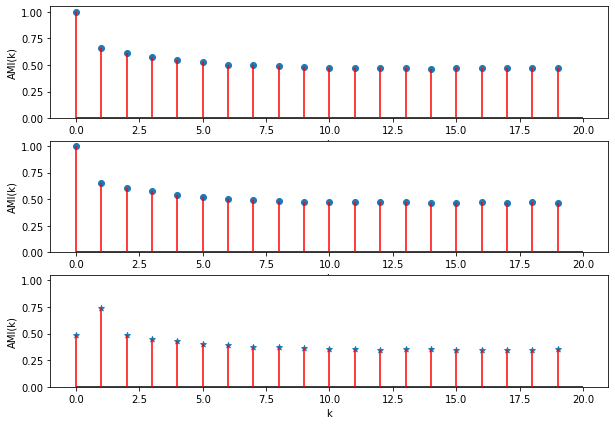

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(10, 7))

plot_ami(st3['x'].values, 20, axis=ax[0])
plot_ami(st3['y'].values, 20, axis=ax[1])
plot_cross_ami(st3['x'].values, st3['y'].values, 20, axis=ax[2])

#### Rossler

In [ ]:
from pyFTS.data import rossler

st4 = rossler.get_dataframe(iterations=5000)

st4.head()

,x,y,z
0,0.001000,0.001000,0.001000
1,0.000980,0.001012,0.002943
2,0.000940,0.001024,0.004775
3,0.000882,0.001035,0.006503
4,0.000807,0.001046,0.008133


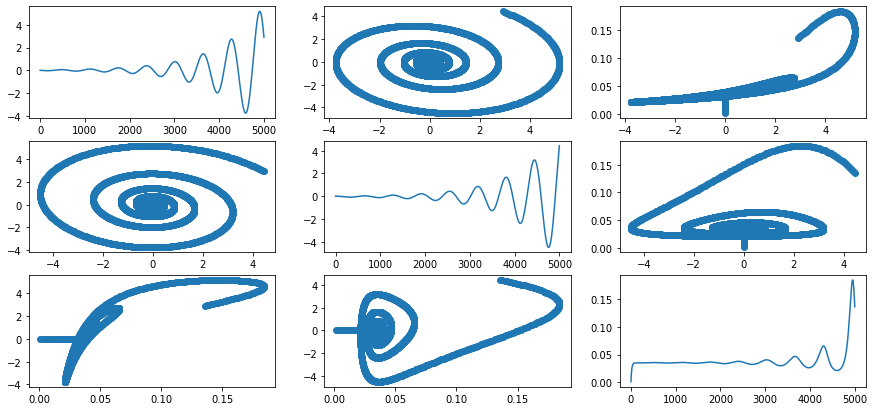

In [ ]:
fig, ax = plt.subplots(3,3,figsize=(15,7))

ax[0][0].plot(st4['x'].values)
ax[0][1].scatter(st4['x'].values, st4['y'].values)
ax[0][2].scatter(st4['x'].values, st4['z'].values)
ax[1][0].scatter(st4['y'].values, st4['x'].values)
ax[1][1].plot(st4['y'].values)
ax[1][2].scatter(st4['y'].values, st4['z'].values)
ax[2][0].scatter(st4['z'].values, st4['x'].values)
ax[2][1].scatter(st4['z'].values, st4['y'].values)
ax[2][2].plot(st4['z'].values)

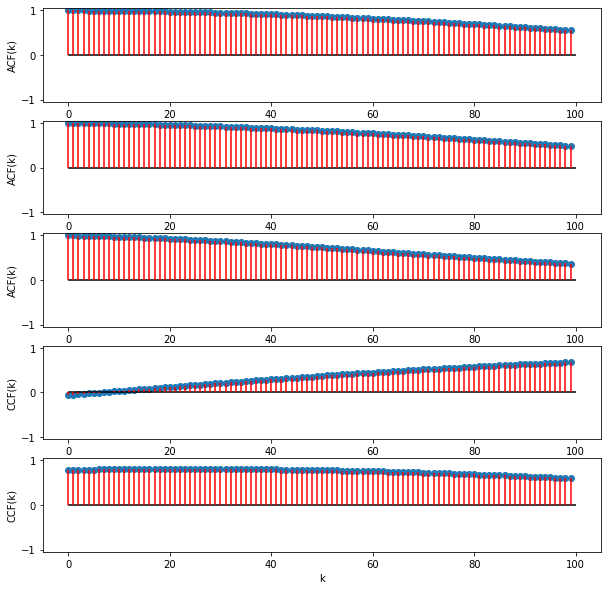

In [ ]:
fig, ax = plt.subplots(5, 1, figsize=(10, 10))

plot_acf(st4['x'].values, 100, axis=ax[0])
plot_acf(st4['y'].values, 100, axis=ax[1])
plot_acf(st4['z'].values, 100, axis=ax[2])
plot_ccf(st4['x'].values, st4['y'].values, 100, axis=ax[3])
plot_ccf(st4['x'].values, st4['z'].values, 100, axis=ax[4])

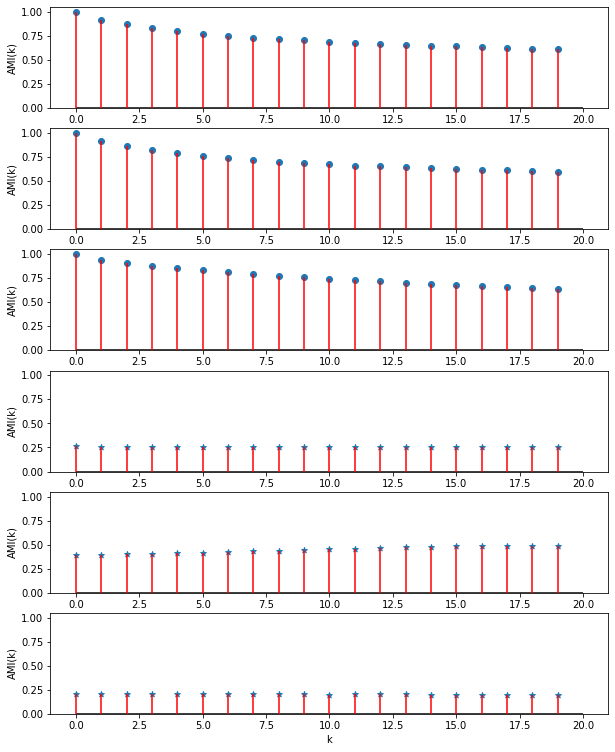

In [ ]:
fig, ax = plt.subplots(6, 1, figsize=(10, 13))

plot_ami(st4['x'].values, 20, axis=ax[0])
plot_ami(st4['y'].values, 20, axis=ax[1])
plot_ami(st4['z'].values, 20, axis=ax[2])
plot_cross_ami(st4['x'].values, st4['y'].values, 20, axis=ax[3])
plot_cross_ami(st4['x'].values, st4['z'].values, 20, axis=ax[4])
plot_cross_ami(st4['y'].values, st4['z'].values, 20, axis=ax[5])

#### Atrator de Lorentz

In [ ]:
from pyFTS.data import lorentz

st5 = lorentz.get_dataframe(iterations=1000)
st5.head()

,x,y,z
0,0.100000,0.000000,0.000000
1,0.090000,0.028000,0.000000
2,0.083800,0.052920,0.000025
3,0.080712,0.075855,0.000069
4,0.080226,0.097696,0.000128


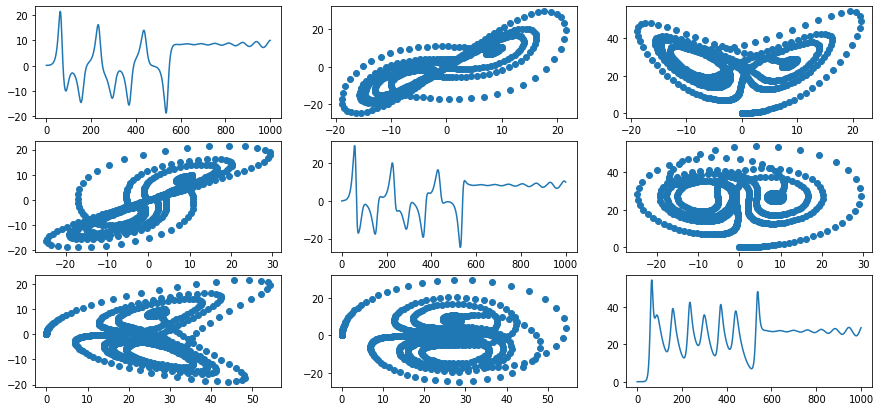

In [ ]:
fig, ax = plt.subplots(3,3,figsize=(15,7))

ax[0][0].plot(st5['x'].values)
ax[0][1].scatter(st5['x'].values, st5['y'].values)
ax[0][2].scatter(st5['x'].values, st5['z'].values)
ax[1][0].scatter(st5['y'].values, st5['x'].values)
ax[1][1].plot(st5['y'].values)
ax[1][2].scatter(st5['y'].values, st5['z'].values)
ax[2][0].scatter(st5['z'].values, st5['x'].values)
ax[2][1].scatter(st5['z'].values, st5['y'].values)
ax[2][2].plot(st5['z'].values)

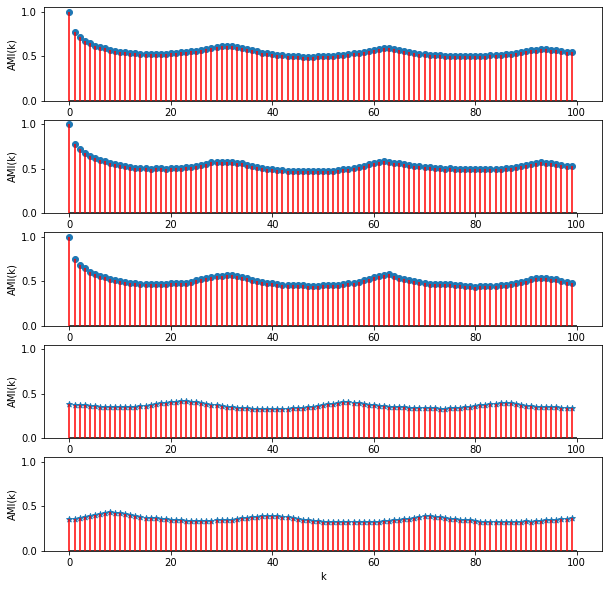

In [ ]:
fig, ax = plt.subplots(5, 1, figsize=(10, 10))

plot_ami(st5['x'].values, 100, axis=ax[0])
plot_ami(st5['y'].values, 100, axis=ax[1])
plot_ami(st5['z'].values, 100, axis=ax[2])
plot_cross_ami(st5['x'].values, st5['y'].values, 100, axis=ax[3])
plot_cross_ami(st5['x'].values, st5['z'].values, 100, axis=ax[4])

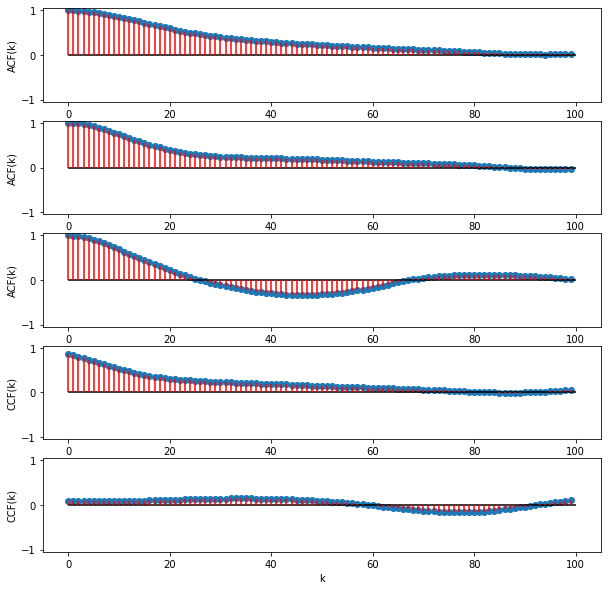

In [ ]:
fig, ax = plt.subplots(5, 1, figsize=(10, 10))

plot_acf(st5['x'].values, 100, axis=ax[0])
plot_acf(st5['y'].values, 100, axis=ax[1])
plot_acf(st5['z'].values, 100, axis=ax[2])
plot_ccf(st5['x'].values, st5['y'].values, 100, axis=ax[3])
plot_ccf(st5['x'].values, st5['z'].values, 100, axis=ax[4])

## Previsão de Séries Temporais Não Lineares

### Modelo NAR(p) - Nonlinear Auto-Regressive

* O modelo NAR(p) é um modelo matemático  auto-regressivo de ordem $p$, ou seja, uma função $f$ que utilize as últimas $p$ defasagens da série temporal $Y$, sendo que $f$ é não-linear.

$$
y(t) = f(\; y(t-1), \ldots,\; y(t-p)\; )
$$

* As Redes Neurais Artificiais do tipo MLP - Multi-Layer Perceptron são candidatas naturais pela sua conhecida propriedade de serem aproximadores universais, isto é, serem capazes de aproximar qualquer função, linear ou não linear, quando corretamente configuradas.

<img src="https://docs.google.com/drawings/d/e/2PACX-1vQj9yi-yCFO97vF_i76502bgLyWytNtSTpALILCZy0fGflqp0sBja30_uIPevYNcmKkQZvAuN6SxI_8/pub?w=943&amp;h=393">

* O NAR(p) então é uma forma de configurar uma rede MLP para que ela atue como uma auto-regressão não-linear de ordem $p$. Essa forma também é referenciada na literatura como NN-NAR(p), NAR(p)-MLP, entre outras nomenclaturas.
* Não só RNAs do tipo MLP podem ser usados, mas outras como RNN - Redes Neurais Recorrentes, LSTM - Long-Short Term Memory, etc.


In [ ]:
# Defasagens 
def lags(dados, p):
  T, n = dados.shape
  X = np.zeros((T-p, n*p))
  Y = dados[p:, :]
  for i in range(p, T):
    for j in range(p):
      X[i - p, j*n:(j*n)+n] = dados[i-(p-j), : ]
  return X, Y


def ajustar_nar(dados, p, **kwargs):
  X,Y = lags(dados, p)

  W1, B1, W2, B2, log_erros = MLP.treinar(X, Y, 
                                  ativacao_camada1 = FuncoesAtivacao.identidade,
                                  ativacao_camada2 = FuncoesAtivacao.identidade,
                                  **kwargs)

  plt.plot(log_erros)

  # Previsões in-sample para calcular a variância dos resíduos

  previsoes = nar(dados, p, [W1, B1, W2, B2, None], **kwargs)

  sigma = np.std(Y - previsoes)  

  return W1, B1, W2, B2, sigma


def nar(dados, p, parametros, **kwargs):
  x,_ = lags(dados, p)
  W1, B1, W2, B2,_ = parametros
  y = MLP.regressao(x, W1, B1, W2, B2,
                    ativacao_camada1 = FuncoesAtivacao.identidade,
                    ativacao_camada2 = FuncoesAtivacao.identidade)
  return np.array(y)

#### Mackey-Glass

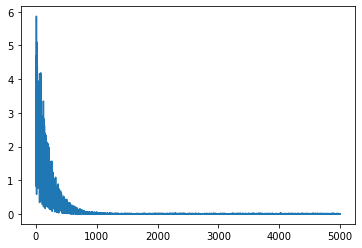

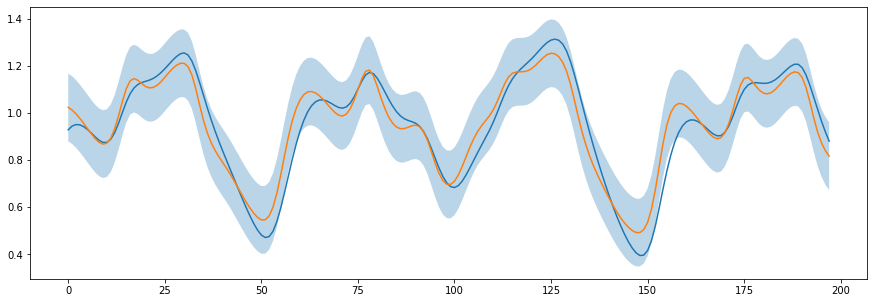

In [ ]:
# Ordem do Modelo NAR(p)
p = 3

treino = np.array(st1[:800]).reshape((800,1))
teste = np.array(st1[800:]).reshape((201,1))

parametros = ajustar_nar(treino, 
                         p, # Ordem do modelo (nº de lags)
                         num_neuron=20, # Qtd de neurônios na camada escondida
                         taxa_aprendizado = 0.0001,  
                         numero_epocas = 100,  # Iterações de treinamento
                         batch=50)

sigma = parametros[-1]

previsoes = nar(teste, p, parametros).flatten()

fig, ax = plt.subplots(1,1,figsize=(15,5))

ax.plot(teste[p:])
ax.plot(previsoes)
ax.fill_between(range(len(teste)-p), previsoes - 2*sigma, previsoes+2*sigma,
                alpha=0.3)

#### Mapa Logístico

/content/RNA/FuncoesCusto.py:5: RuntimeWarning: overflow encountered in double_scalars
  return ((y-yl)**2)/2
/content/RNA/MLP.py:76: RuntimeWarning: overflow encountered in double_scalars
  delta1 = ativacao_camada1(net1[neuronio], derivada=True) * np.sum([delta2[j] * W2[j][neuronio] for j in range(num_out)])
/content/RNA/MLP.py:41: RuntimeWarning: invalid value encountered in add
  net = W1[neuronio].dot(X[i,:]) + B1[neuronio]


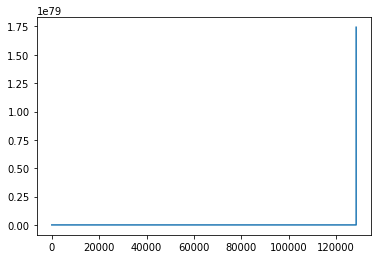

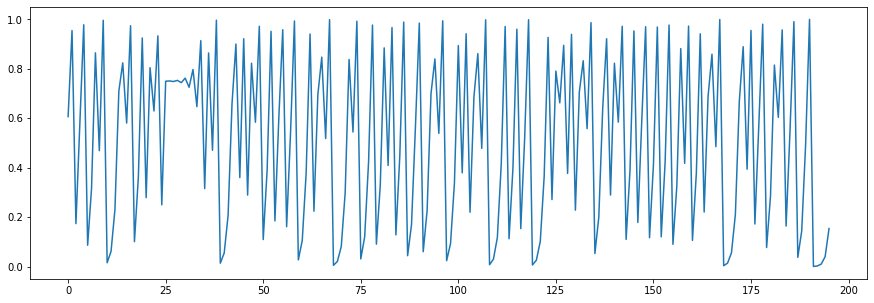

In [ ]:
p = 5
treino = np.array(st2[:800]).reshape((800,1))
teste = np.array(st2[800:]).reshape((201,1))

parametros = ajustar_nar(treino, p, taxa_aprendizado = 0.0001,  
                                  numero_epocas = 10000,
                                  num_neuron=30,
                                  batch=50)

sigma = parametros[-1]

previsoes = nar(teste, p, parametros).flatten()

fig, ax = plt.subplots(1,1,figsize=(15,5))

ax.plot(teste[p:])
ax.plot(previsoes)
ax.fill_between(range(len(teste)-p), previsoes - 2*sigma, previsoes+2*sigma,
                alpha=0.3)

### Modelo NVAR(p) - Nonlinear Vector Auto-Regression

* O modelo NVAR(p) é apenas a nomenclatura dada aos modelos autoregressivos não-lineares do tipo MIMO - Multiple Input, Multiple Output, ou seja, para séries multivariadas.

In [ ]:
def ajustar_nvar(dados, p, **kwargs):
  X,Y = lags(dados, p)

  W1, B1, W2, B2, log_erros = MLP.treinar(X, Y, 
                                  ativacao_camada1 = FuncoesAtivacao.identidade,
                                  ativacao_camada2 = FuncoesAtivacao.identidade,
                                  **kwargs)

  plt.plot(log_erros)

  previsoes = nvar(dados, p, [W1, B1, W2, B2, None], **kwargs)

  residuos = Y - previsoes

  Sigma = np.sqrt(np.cov(residuos, rowvar=False)) 

  return W1, B1, W2, B2, Sigma

def nvar(dados, p, parametros, **kwargs):
  x,_ = lags(dados, p)
  W1, B1, W2, B2,_ = parametros
  y = MLP.regressao(x, W1, B1, W2, B2,
                    ativacao_camada1 = FuncoesAtivacao.identidade,
                    ativacao_camada2 = FuncoesAtivacao.identidade)
  return np.array(y)

#### Mapa de Henon

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


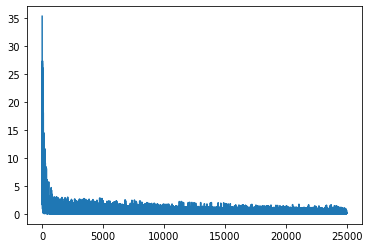

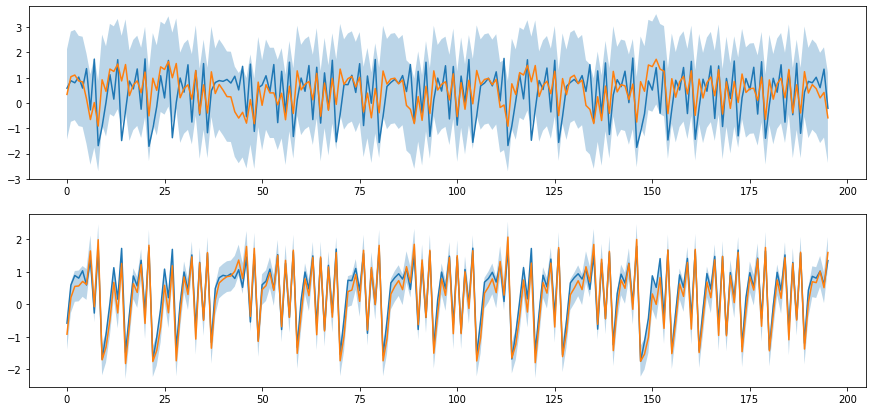

In [ ]:
p = 5
treino = np.array(st3.values[:800]).reshape((800,2))
teste = np.array(st3.values[800:]).reshape((201,2))

parametros = ajustar_nvar(treino, p, taxa_aprendizado = 0.0001,  
                                  numero_epocas = 500,
                                  num_neuron=30,
                                  batch=50)

sigma = parametros[-1]

previsoes = nvar(teste, p, parametros)

fig, ax = plt.subplots(2,1,figsize=(15,7))

ax[0].plot(teste[p:, 0])
ax[0].plot(previsoes[:, 0])
ax[0].fill_between(range(200-p+1), previsoes[:, 0] - 2*sigma[0,0], 
                   previsoes[:, 0]+2*sigma[0,0], alpha=0.3)

ax[1].plot(teste[p:, 1])
ax[1].plot(previsoes[:, 1])
ax[1].fill_between(range(200-p+1), previsoes[:, 1] - 2*sigma[1,1], 
                   previsoes[:, 1]+2*sigma[1,1], alpha=0.3)

#### Rossler

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


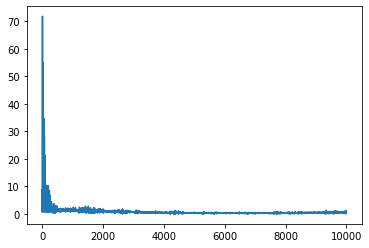

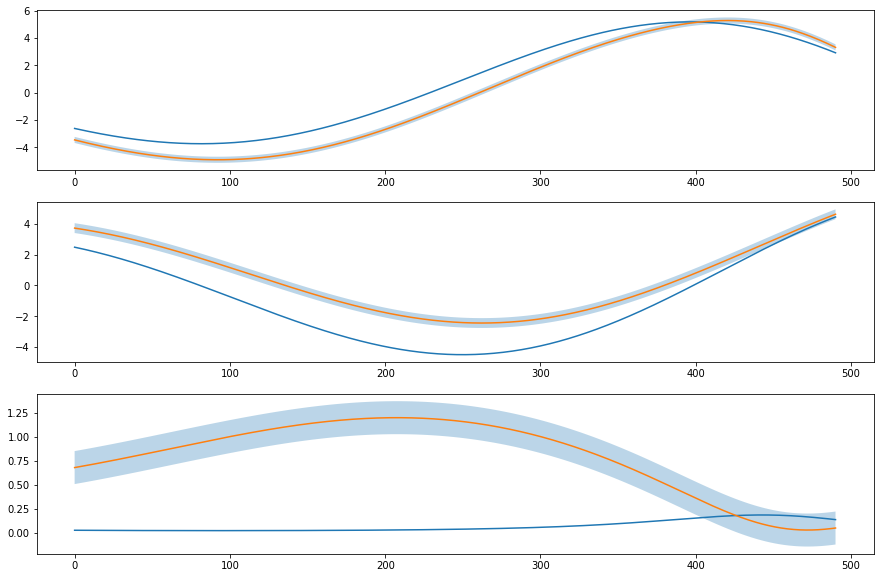

In [ ]:
p = 10
treino = np.array(st4.values[:4500]).reshape((4500,3))
teste = np.array(st4.values[4500:]).reshape((501,3))

parametros = ajustar_nvar(treino, p, taxa_aprendizado = 0.0001,  
                                  numero_epocas = 200,
                                  num_neuron=30,
                                  batch=50)

sigma = parametros[-1]

previsoes = nvar(teste, p, parametros)

fig, ax = plt.subplots(3,1,figsize=(15,10))

ax[0].plot(teste[p:, 0])
ax[0].plot(previsoes[:, 0])
ax[0].fill_between(range(500-p+1), previsoes[:, 0] - 2*sigma[0,0], 
                   previsoes[:, 0]+2*sigma[0,0], alpha=0.3)

ax[1].plot(teste[p:, 1])
ax[1].plot(previsoes[:, 1])
ax[1].fill_between(range(500-p+1), previsoes[:, 1] - 2*sigma[1,1], 
                   previsoes[:, 1]+2*sigma[1,1], alpha=0.3)

ax[2].plot(teste[p:, 2])
ax[2].plot(previsoes[:, 2])
ax[2].fill_between(range(500-p+1), previsoes[:, 2] - 2*sigma[2,2], 
                   previsoes[:, 2]+2*sigma[2,2], alpha=0.3)

#### Lorentz

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


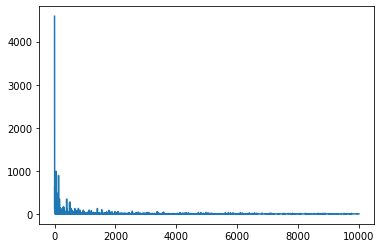

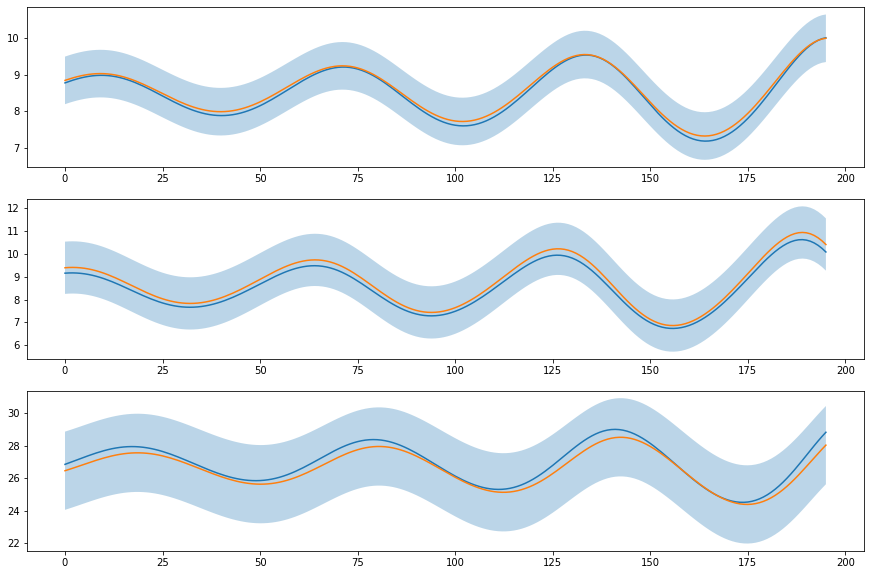

In [ ]:
p = 5
treino = np.array(st5.values[:800]).reshape((800,3))
teste = np.array(st5.values[800:]).reshape((201,3))

parametros = ajustar_nvar(treino, p, taxa_aprendizado = 0.00001,  
                                  numero_epocas = 200,
                                  num_neuron=10,
                                  batch=50)

sigma = parametros[-1]

previsoes = nvar(teste, p, parametros)

fig, ax = plt.subplots(3,1,figsize=(15,10))

ax[0].plot(teste[p:, 0])
ax[0].plot(previsoes[:, 0])
ax[0].fill_between(range(200-p+1), previsoes[:, 0] - 2*sigma[0,0], 
                   previsoes[:, 0]+2*sigma[0,0], alpha=0.3)

ax[1].plot(teste[p:, 1])
ax[1].plot(previsoes[:, 1])
ax[1].fill_between(range(200-p+1), previsoes[:, 1] - 2*sigma[1,1], 
                   previsoes[:, 1]+2*sigma[1,1], alpha=0.3)

ax[2].plot(teste[p:, 2])
ax[2].plot(previsoes[:, 2])
ax[2].fill_between(range(200-p+1), previsoes[:, 2] - 2*sigma[2,2], 
                   previsoes[:, 2]+2*sigma[2,2], alpha=0.3)

### NARMA(p,q) - Nonlinear Auto-Regressive with Moving Average

* O modelo NARMA(p,q) é um modelo matemático  auto-regressivo de ordem $p$ com médias móveis de ordem $q$, ou seja, uma função $f$ que utilize as últimas $p$ defasagens da série temporal $Y$ e os últimos $q$ resíduos, sendo que $f$ é não-linear.

$$
y(t) = f(\; y(t-1),\; \ldots,\; y(t-p)\;,\; \epsilon(t-1),\;\ldots,\;\epsilon(t-q)\; )
$$

* A implementação de um modelo NN-NARMA(p,q) utilizando RNAs, a primeira processará a entrada das $p$ defasagens de $Y$ e a segunda processará os $q$ resíduos.

In [ ]:
def ajustar_narma(dados, p, q, **kwargs):

  # AR - Prevê a variável endógena

  X,Y = lags(dados, p)

  W11, B11, W12, B12, log_erros = MLP.treinar(X, Y, 
                                  ativacao_camada1 = FuncoesAtivacao.identidade,
                                  ativacao_camada2 = FuncoesAtivacao.identidade,
                                  **kwargs)

  plt.plot(log_erros)

  # MA - Prevê os Resíduos

  previsoes = nar(dados, p, [W11, B11, W12, B12, None], **kwargs)

  residuos = Y - previsoes

  X2,Y2 = lags(residuos, q)

  W21, B21, W22, B22, log_erros = MLP.treinar(X2, Y2, 
                                  ativacao_camada1 = FuncoesAtivacao.identidade,
                                  ativacao_camada2 = FuncoesAtivacao.identidade,
                                  **kwargs)
  
  previsoes2 = nar(residuos, q, [W21, B21, W22, B22, None], **kwargs)

  # AR + MA - Previsão final 

  Yf = previsoes[q:] + previsoes2

  sigma = np.std(Y[q:] - Yf)  

  return W11, B11, W12, B12, W21, B21, W22, B22, sigma

def narma(dados, p, q, parametros, **kwargs):
  x,_ = lags(dados, p)
  W11, B11, W12, B12, W21, B21, W22, B22, _ = parametros
  y1 = MLP.regressao(x, W11, B11, W12, B12,
                    ativacao_camada1 = FuncoesAtivacao.identidade,
                    ativacao_camada2 = FuncoesAtivacao.identidade)
  residuos = dados[p:] - y1
  x2,_ = lags(residuos, q)
  y2 = MLP.regressao(x2, W21, B21, W22, B22,
                    ativacao_camada1 = FuncoesAtivacao.identidade,
                    ativacao_camada2 = FuncoesAtivacao.identidade)
  return np.array(np.array(y1[q:]) + np.array(y2))

#### Mackey-Glass

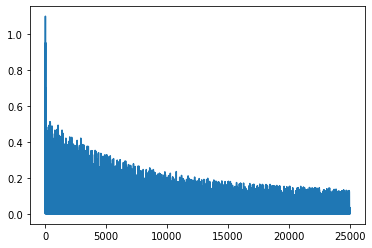

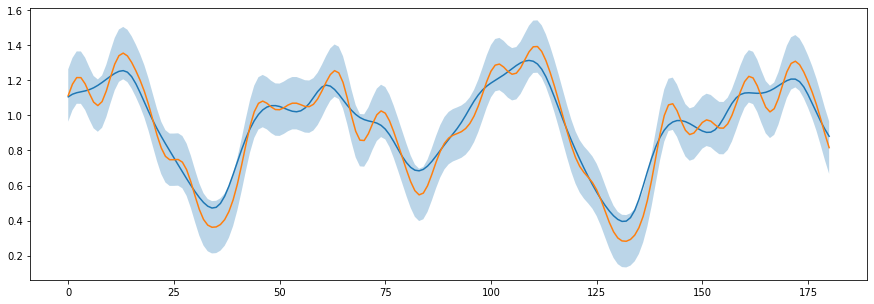

In [ ]:
p = 10
q = 10
treino = np.array(st1[:800]).reshape((800,1))
teste = np.array(st1[800:]).reshape((201,1))

parametros = ajustar_narma(treino, p, q, taxa_aprendizado = 0.0001,  
                                  numero_epocas = 500,
                                  num_neuron=20,
                                  batch=50)

sigma = parametros[-1]

previsoes = narma(teste, p, q, parametros).flatten()

fig, ax = plt.subplots(1,1,figsize=(15,5))

ax.plot(teste[p+q:])
ax.plot(previsoes)
ax.fill_between(range(len(teste)-p-q), previsoes - 2*sigma, previsoes+2*sigma,
                alpha=0.3)

#### Mapa Logístico

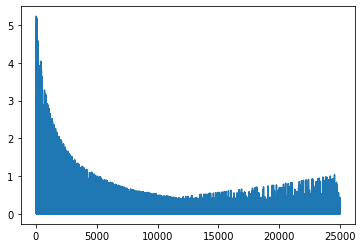

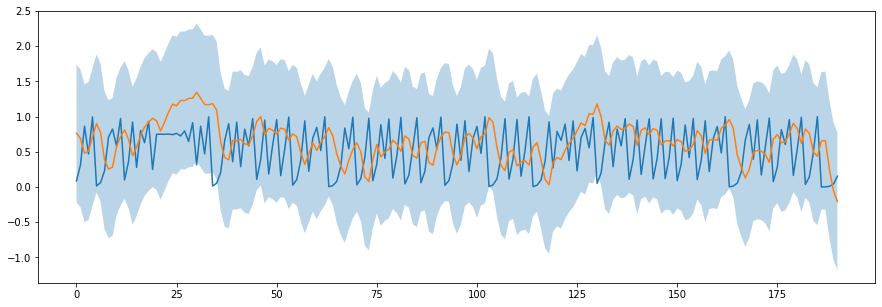

In [ ]:
p = 5
q = 5
treino = np.array(st2[:800]).reshape((800,1))
teste = np.array(st2[800:]).reshape((201,1))

parametros = ajustar_narma(treino, p, q, taxa_aprendizado = 0.0001,  
                                  numero_epocas = 500,
                                  num_neuron=20,
                                  batch=50)

sigma = parametros[-1]

previsoes = narma(teste, p, q, parametros).flatten()

fig, ax = plt.subplots(1,1,figsize=(15,5))

ax.plot(teste[p+q:])
ax.plot(previsoes)
ax.fill_between(range(len(teste)-p-q), previsoes - 2*sigma, previsoes+2*sigma,
                alpha=0.3)

### Modelo NVARMA(p,q) - Nonlinear Vector Auto-Regression with Moving Average 

In [ ]:
def ajustar_nvarma(dados, p, q, **kwargs):
  X,Y = lags(dados, p)

  W11, B11, W12, B12, log_erros = MLP.treinar(X, Y, 
                                  ativacao_camada1 = FuncoesAtivacao.identidade,
                                  ativacao_camada2 = FuncoesAtivacao.identidade,
                                  **kwargs)

  plt.plot(log_erros)

  previsoes = nar(dados, p, [W11, B11, W12, B12, None], **kwargs)

  residuos = Y - previsoes

  X2,Y2 = lags(residuos, q)

  W21, B21, W22, B22, log_erros = MLP.treinar(X2, Y2, 
                                  ativacao_camada1 = FuncoesAtivacao.identidade,
                                  ativacao_camada2 = FuncoesAtivacao.identidade,
                                  **kwargs)
  
  previsoes2 = nar(residuos, q, [W21, B21, W22, B22, None], **kwargs)

  Yf = previsoes[q:, :] + previsoes2

  Sigma = np.sqrt(np.cov(Y[q:, :] - Yf, rowvar=False)) 

  return W11, B11, W12, B12, W21, B21, W22, B22, Sigma

def nvarma(dados, p, q, parametros, **kwargs):
  x,_ = lags(dados, p)
  W11, B11, W12, B12, W21, B21, W22, B22, _ = parametros
  y1 = MLP.regressao(x, W11, B11, W12, B12,
                    ativacao_camada1 = FuncoesAtivacao.identidade,
                    ativacao_camada2 = FuncoesAtivacao.identidade)
  y1 = np.array(y1)
  residuos = dados[p:, :] - y1
  x2,_ = lags(residuos, q)
  y2 = MLP.regressao(x2, W21, B21, W22, B22,
                    ativacao_camada1 = FuncoesAtivacao.identidade,
                    ativacao_camada2 = FuncoesAtivacao.identidade)
  return np.array(y1[q:, :] + np.array(y2))

#### Henon

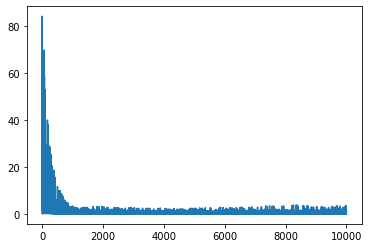

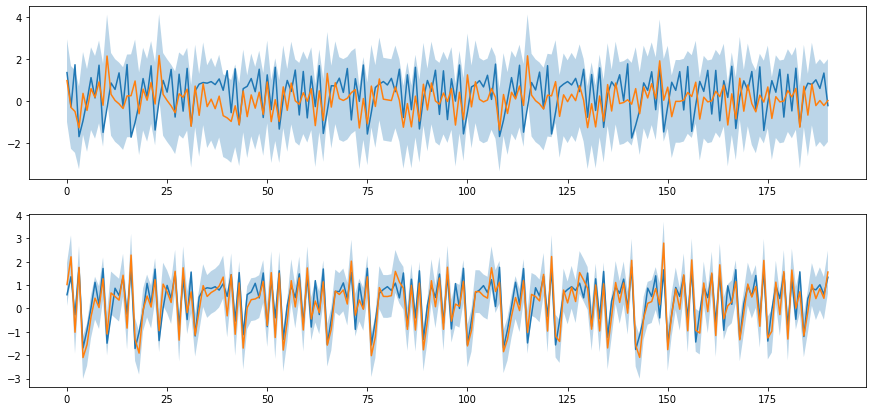

In [ ]:
p = 5
q = 5
treino = np.array(st3.values[:800]).reshape((800,2))
teste = np.array(st3.values[800:]).reshape((201,2))

parametros = ajustar_nvarma(treino, p, q, 
                            taxa_aprendizado = 0.0001,  
                            numero_epocas = 200,
                            num_neuron=20,
                            batch=50)

sigma = parametros[-1]

previsoes = nvarma(teste, p, q, parametros)

fig, ax = plt.subplots(2,1,figsize=(15,7))

ax[0].plot(teste[p+q:, 0])
ax[0].plot(previsoes[:, 0])
ax[0].fill_between(range(len(previsoes[:,0])), previsoes[:, 0] - 2*sigma[0,0], 
                   previsoes[:, 0]+2*sigma[0,0], alpha=0.3)

ax[1].plot(teste[p+q:, 1])
ax[1].plot(previsoes[:, 1])
ax[1].fill_between(range(len(previsoes[:,1])), previsoes[:, 1] - 2*sigma[1,1], 
                   previsoes[:, 1]+2*sigma[1,1], alpha=0.3)

#### Rossler

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in sqrt


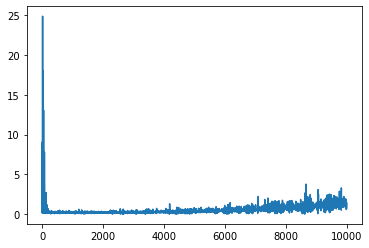

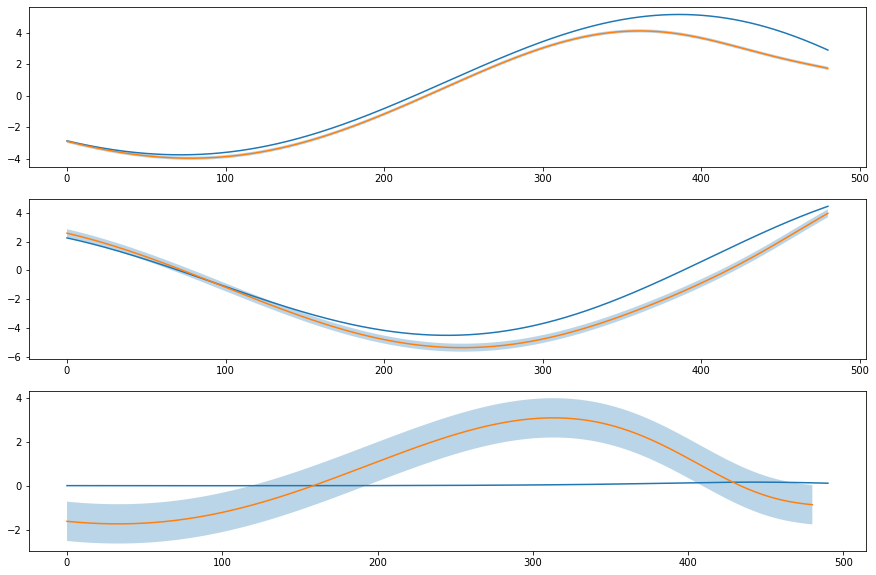

In [ ]:
p = 10
q = 10
treino = np.array(st4.values[:4500]).reshape((4500,3))
teste = np.array(st4.values[4500:]).reshape((501,3))

parametros = ajustar_nvarma(treino, p, q,
                            taxa_aprendizado = 0.0001,  
                            numero_epocas = 200,
                            num_neuron=50,
                            batch=50)

sigma = parametros[-1]

previsoes = nvarma(teste, p, q, parametros)

fig, ax = plt.subplots(3,1,figsize=(15,10))

ax[0].plot(teste[p+q:, 0])
ax[0].plot(previsoes[:, 0])
ax[0].fill_between(range(500-p-q+1), previsoes[:, 0] - 2*sigma[0,0], 
                   previsoes[:, 0]+2*sigma[0,0], alpha=0.3)

ax[1].plot(teste[p+q:, 1])
ax[1].plot(previsoes[:, 1])
ax[1].fill_between(range(500-p-q+1), previsoes[:, 1] - 2*sigma[1,1], 
                   previsoes[:, 1]+2*sigma[1,1], alpha=0.3)

ax[2].plot(teste[p:, 2])
ax[2].plot(previsoes[:, 2])
ax[2].fill_between(range(500-p-q+1), previsoes[:, 2] - 2*sigma[2,2], 
                   previsoes[:, 2]+2*sigma[2,2], alpha=0.3)

#### Lorentz

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in sqrt


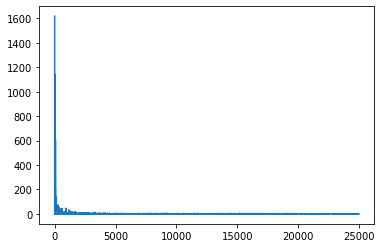

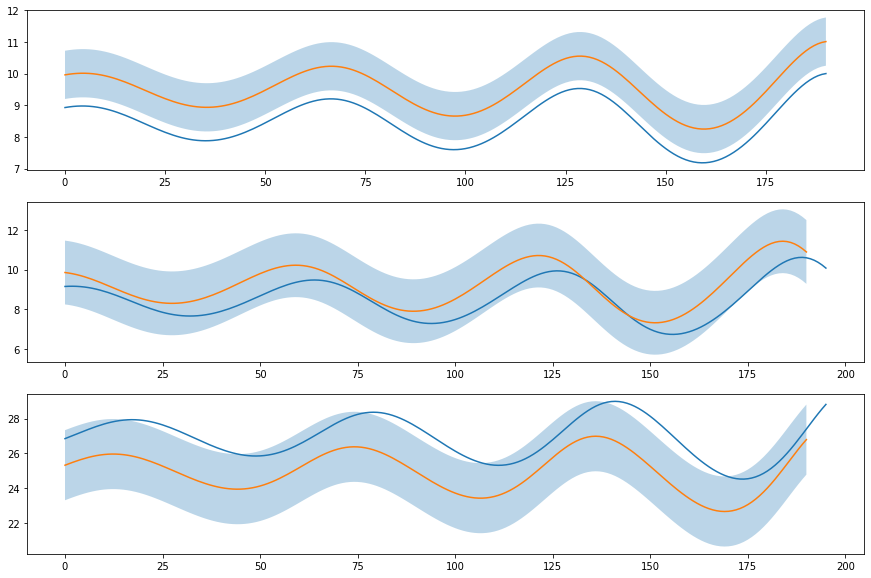

In [ ]:
p = 5
q = 5
treino = np.array(st5.values[:800]).reshape((800,3))
teste = np.array(st5.values[800:]).reshape((201,3))

parametros = ajustar_nvarma(treino, p, q,
                            taxa_aprendizado = 0.00001,  
                            numero_epocas = 500,
                            num_neuron=20,
                            batch=50)

sigma = parametros[-1]

previsoes = nvarma(teste, p, q, parametros)

fig, ax = plt.subplots(3,1,figsize=(15,10))

ax[0].plot(teste[p+q:, 0])
ax[0].plot(previsoes[:, 0])
ax[0].fill_between(range(200-p-q+1), previsoes[:, 0] - 2*sigma[0,0], 
                   previsoes[:, 0]+2*sigma[0,0], alpha=0.3)

ax[1].plot(teste[p:, 1])
ax[1].plot(previsoes[:, 1])
ax[1].fill_between(range(200-p-q+1), previsoes[:, 1] - 2*sigma[1,1], 
                   previsoes[:, 1]+2*sigma[1,1], alpha=0.3)

ax[2].plot(teste[p:, 2])
ax[2].plot(previsoes[:, 2])
ax[2].fill_between(range(200-p-q+1), previsoes[:, 2] - 2*sigma[2,2], 
                   previsoes[:, 2]+2*sigma[2,2], alpha=0.3)